<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/MIP231030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'statds' from a github remote, the SHA1 (b1654401) has not changed since last install.
  Use `force = TRUE` to force installation



In [46]:
library(tidyverse); library(statds); library(grid);
library(directlabels); library(scales)
theme_set(mytheme_bw(36)+
            theme(axis.title.x = element_text(family = "serif"),
                  axis.title.y = element_text(family = "serif")))


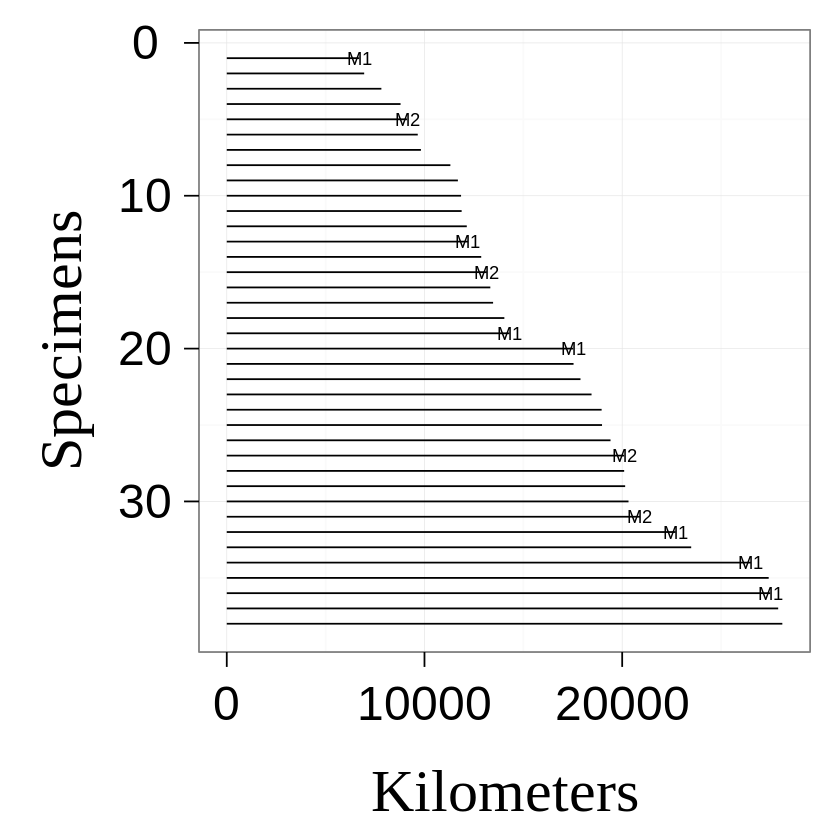

In [30]:
# source("data.R") # see p.59
distance = statds::shock.absorbers$Distance
mode = statds::shock.absorbers$Failure.Mode

data.frame(t=distance, mode) %>%
  mutate(i = seq_along(t)) %>%
  ggplot(aes(0, i))+
  geom_segment(aes(xend=t, yend=i))+
  geom_text(aes(x=t, label=mode))+
  xlab("Kilometers")+ylab("Specimens")+
  scale_y_reverse()


,t,nj
,<dbl>,<int>
1,6700,38
5,9120,34
13,12200,26
15,13150,24
19,14300,20
20,17520,19
27,20100,12
31,20900,8
32,22700,7


,t,nj,p,q,SF,CDF
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6700,38,0.02631579,0.9736842,0.9736842,0.02631579
5,9120,34,0.02941176,0.9705882,0.9450464,0.05495356
13,12200,26,0.03846154,0.9615385,0.9086985,0.09130150
15,13150,24,0.04166667,0.9583333,0.8708361,0.12916394
19,14300,20,0.05000000,0.9500000,0.8272943,0.17270574
20,17520,19,0.05263158,0.9473684,0.7837525,0.21624754
27,20100,12,0.08333333,0.9166667,0.7184398,0.28156025
31,20900,8,0.12500000,0.8750000,0.6286348,0.37136522
32,22700,7,0.14285714,0.8571429,0.5388298,0.46117019


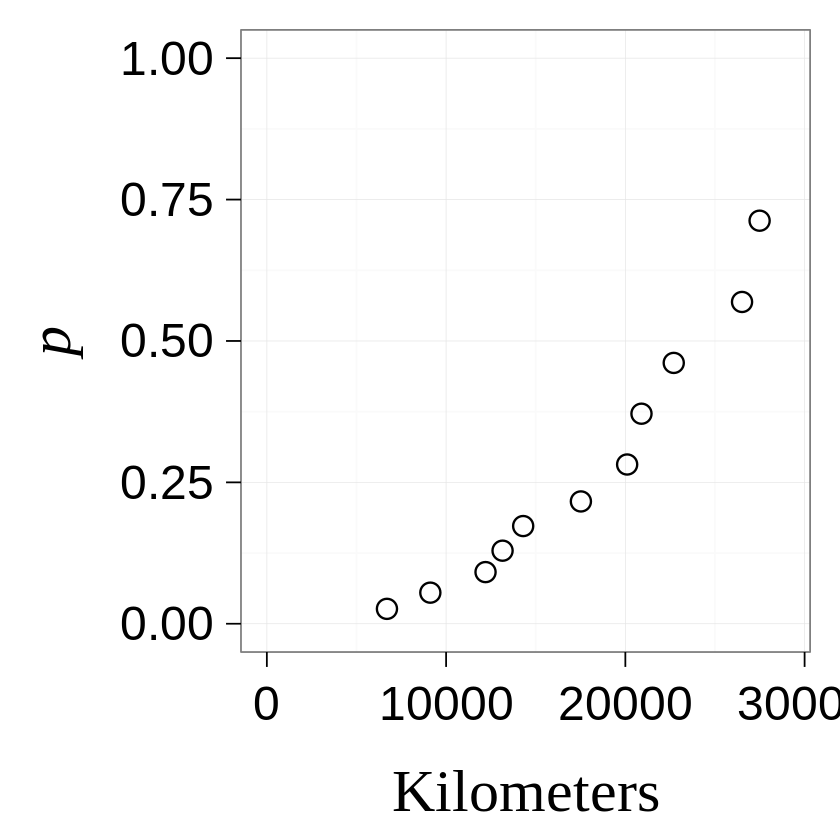

In [31]:
nj = rev(seq_along(distance))
d = data.frame(t=distance, nj)
d = d[which(mode%in%c("M1", "M2")), ]
d

d = d %>%
  mutate(p = 1/nj) %>%
  mutate(q = 1-p) %>%
  mutate(SF = cumprod(q)) %>%
  mutate(CDF = 1-SF)
d

p = d %>%
  ggplot()+
  geom_pointj(aes(t, CDF), size=5)+
  xlim(c(0, max(d$t)*1.05))+ylim(c(0,1))+
  xlab("Kilometers")+ylab(quote(italic(p)))
p


,t,nj
,<dbl>,<int>
1,6700,38
5,9120,34
13,12200,26
15,13150,24
19,14300,20
20,17520,19
27,20100,12
31,20900,8
32,22700,7


,t,nj,p,q,SF,CDF
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6700,38,0.02631579,0.9736842,0.9736842,0.02631579
5,9120,34,0.02941176,0.9705882,0.9450464,0.05495356
13,12200,26,0.03846154,0.9615385,0.9086985,0.09130150
15,13150,24,0.04166667,0.9583333,0.8708361,0.12916394
19,14300,20,0.05000000,0.9500000,0.8272943,0.17270574
20,17520,19,0.05263158,0.9473684,0.7837525,0.21624754
27,20100,12,0.08333333,0.9166667,0.7184398,0.28156025
31,20900,8,0.12500000,0.8750000,0.6286348,0.37136522
32,22700,7,0.14285714,0.8571429,0.5388298,0.46117019


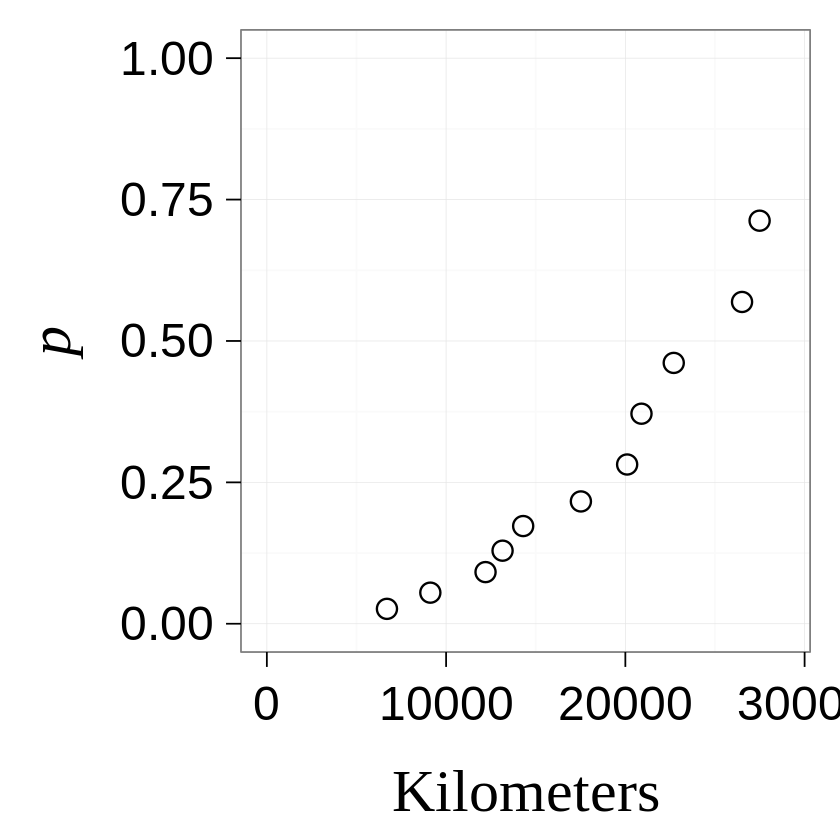

In [32]:
nj = rev(seq_along(distance))
d = data.frame(t=distance, nj)
d = d[which(mode%in%c("M1", "M2")), ]
d

d = d %>%
  mutate(p = (1)/nj) %>%
  mutate(q = 1-p) %>%
  mutate(SF = cumprod(q)) %>%
  mutate(CDF = 1-SF)
d

p = d %>%
  ggplot()+
  geom_pointj(aes(t, CDF), size=5)+
  xlim(c(0, max(d$t)*1.05))+ylim(c(0,1))+
  xlab("Kilometers")+ylab(quote(italic(p)))
p


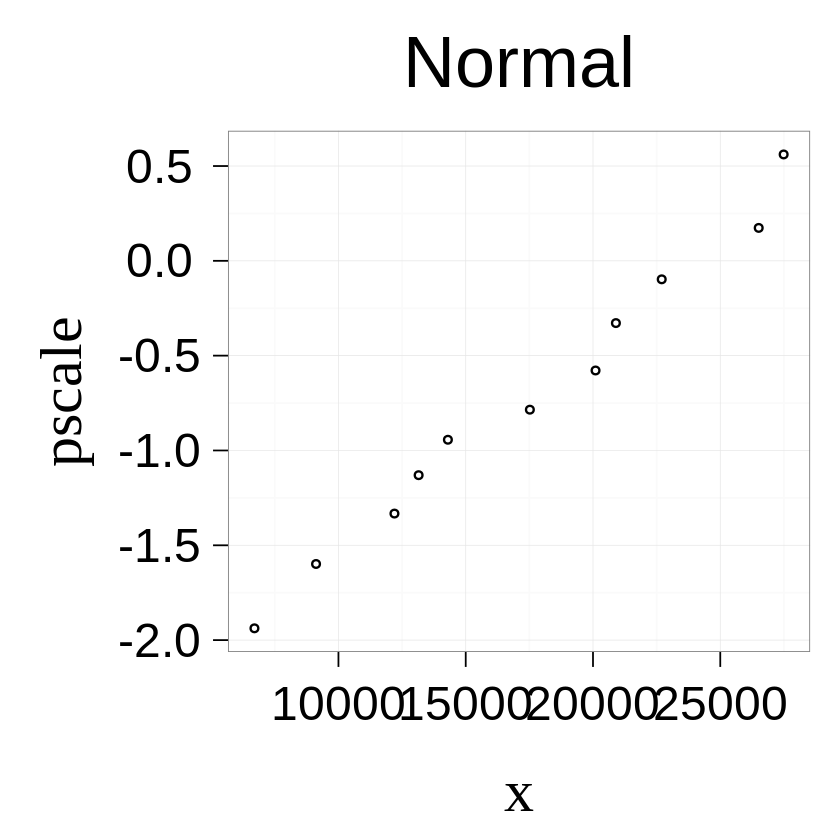

In [33]:
###' Normal Distribution
##############################
d$x = d$t
d$pscale = qnorm(d$CDF)
##############################
p.normal = d %>%
  ggplot(aes(x, pscale))+
  geom_pointj(show.legend = F) +
  ggtitle("Normal")
p.normal
# ggsave("shock_absorbers_pp_normal.pdf", width=sw, height=sh)



In [34]:
least.square = function(x, y){
  n = length(y)
  if(!is.matrix(x)){
    k= 1
  }else {
    k = ncol(x)
  }
  X = matrix(c(rep(1, n), x), ncol=k+1)
  Y = matrix(y)
  beta = solve(t(X) %*% X) %*% t(X) %*% Y
  sigma2 = t(Y-X %*% beta) %*% (Y-X %*% beta) / (n-k-1)
  return(c(beta, sigma2))
}


In [35]:
x = d$t
y = qnorm(d$CDF)
par.n = least.square(x, y)
par.n

[1] -2.6457442457  0.0001106815  0.0104533858

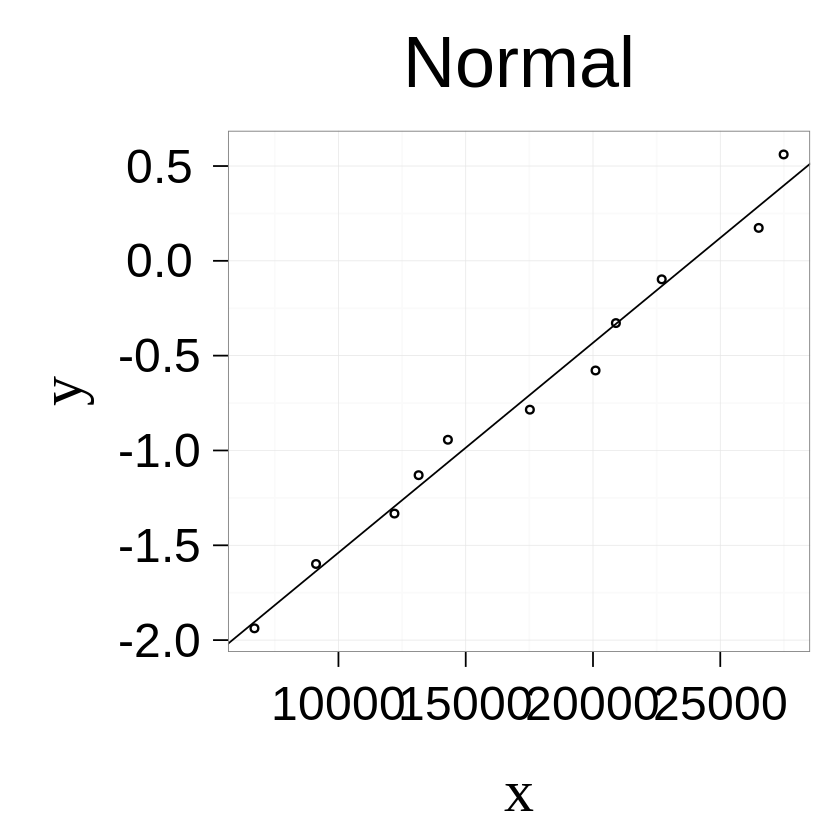

In [36]:
p.normal = data.frame(x, y) %>%
  ggplot(aes(x, y))+
  geom_pointj(show.legend = F) +
  ggtitle("Normal")+
    geom_abline(slope= par.n[2], intercept =par.n[1])
p.normal


Warning message:
“Removed 88 rows containing missing values (`geom_line()`).”


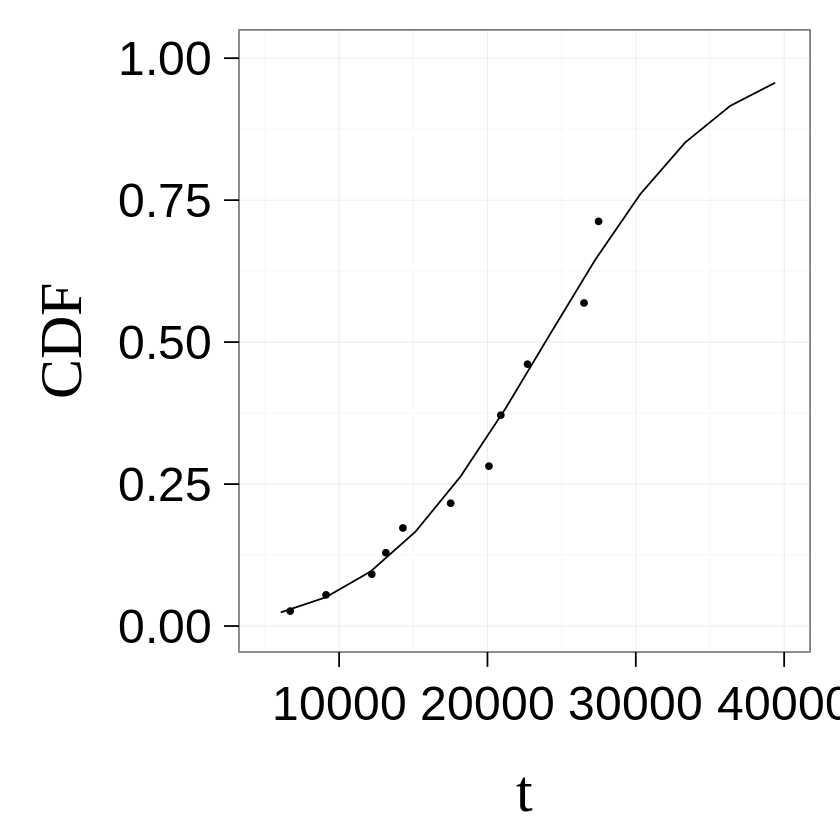

In [37]:
sigma = 1/par.n[2]
mu = -par.n[1]/par.n[2]

# d %>% ggplot(aes(log(t), CDF)) + geom_point()
x = seq(0, 300000, len=100)
y = pnorm((x-mu)/sigma)
d.normal = data.frame(x, y)

d %>% ggplot(aes(t, CDF)) + geom_point() +
  geom_line(data = d.normal, aes(x, y)) +
  xlim(c(5000, 40000))


In [38]:
x = log(d$t)
y = qnorm(d$CDF)
par.n = least.square(x, y)
par.n

[1] -16.7862052   1.6594182   0.0384424

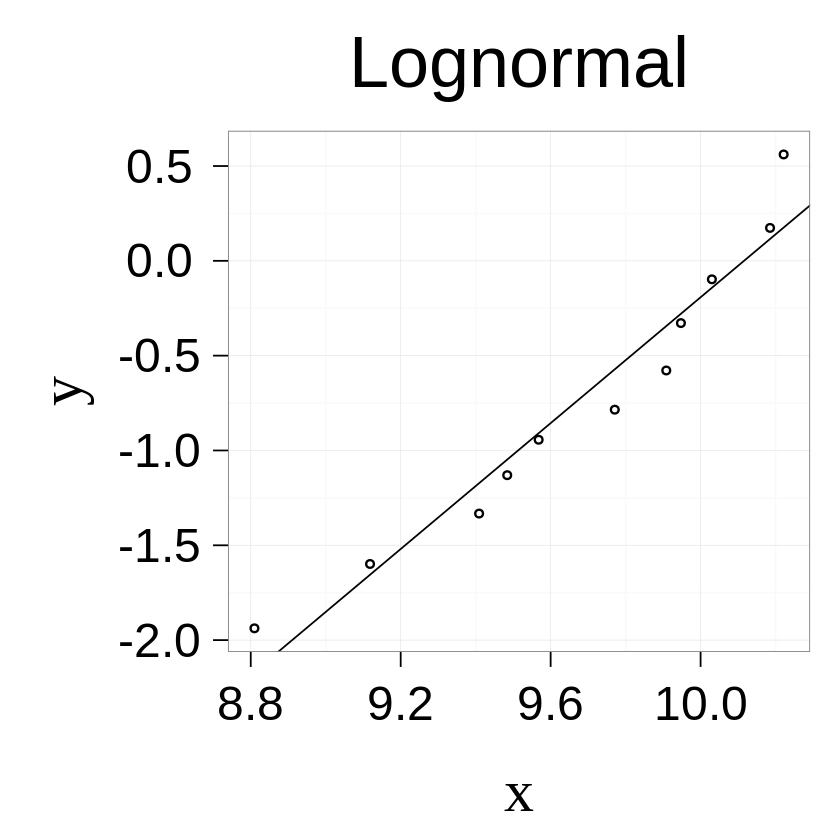

In [39]:
p.lognormal = data.frame(x, y) %>%
  ggplot(aes(x, y))+
  geom_pointj(show.legend = F) +
  ggtitle("Lognormal")+
    geom_abline(slope= par.n[2], intercept =par.n[1])
p.lognormal


Warning message:
“Removed 88 rows containing missing values (`geom_line()`).”


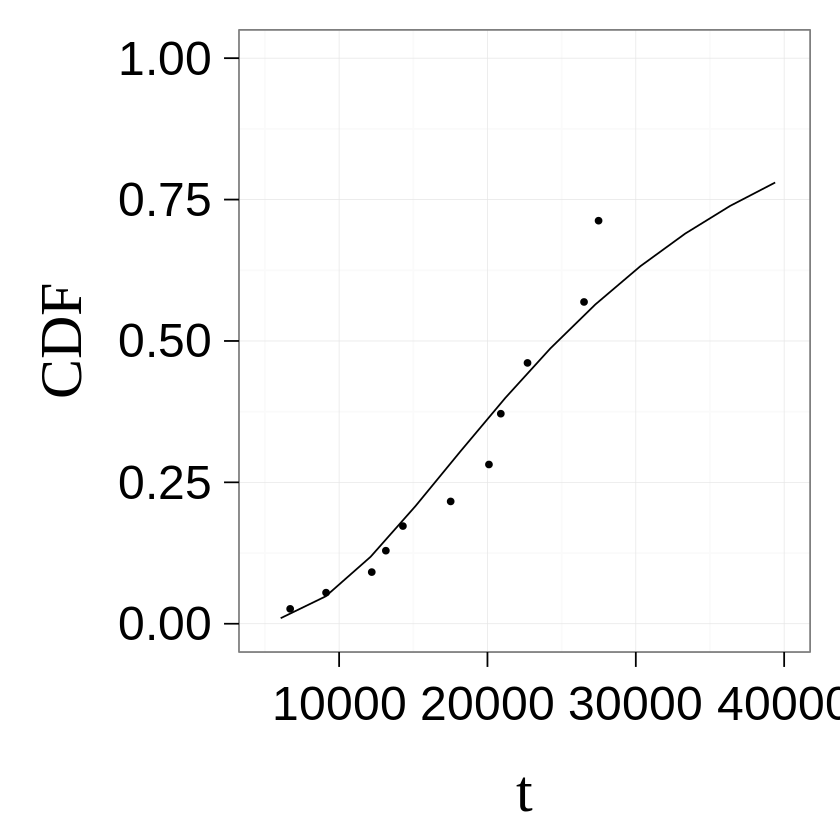

In [40]:
sigma = 1/par.n[2]
mu = -par.n[1]/par.n[2]

x = seq(0, 300000, len=100)
y = pnorm((log(x)-mu)/sigma)
d.lognormal = data.frame(x, y)

d %>% ggplot(aes(t, CDF)) + geom_point() +
  geom_line(data = d.lognormal, aes(x, y)) +
  xlim(c(5000, 40000))


In [41]:
x = log(d$t)
y = log(-log(1-d$CDF))
par.n = least.square(x, y)
par.n

[1] -26.70514780   2.60727249   0.02506843

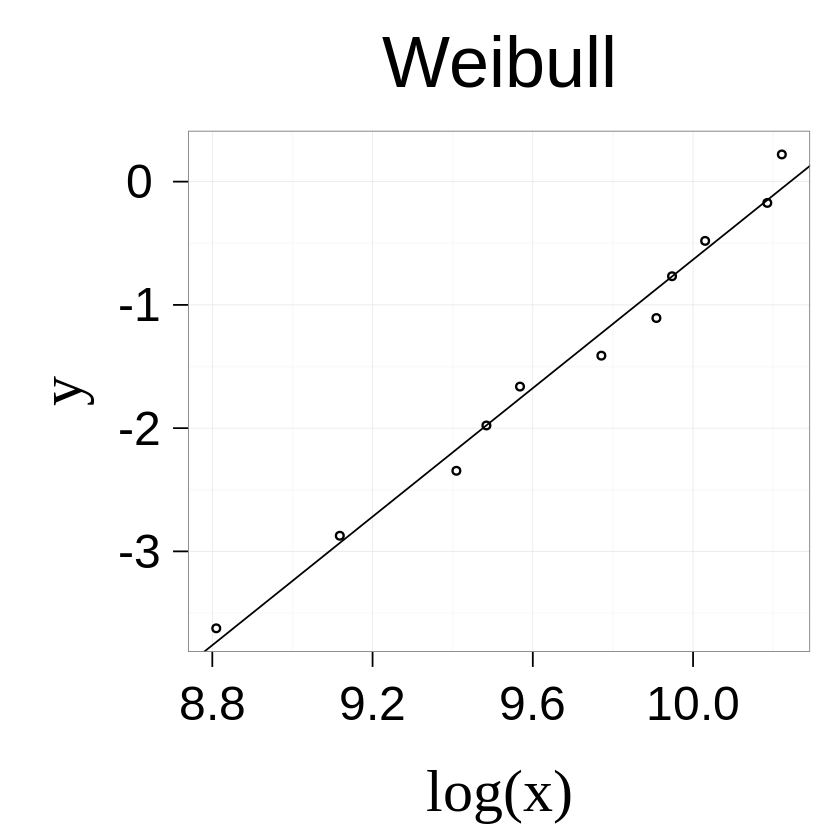

In [42]:
p.weibull = d %>%
  ggplot(aes(log(x), y))+
  geom_pointj(show.legend = F) +
  ggtitle("Weibull")+
    geom_abline(slope= par.n[2], intercept =par.n[1])
p.weibull


Warning message:
“Removed 88 rows containing missing values (`geom_line()`).”


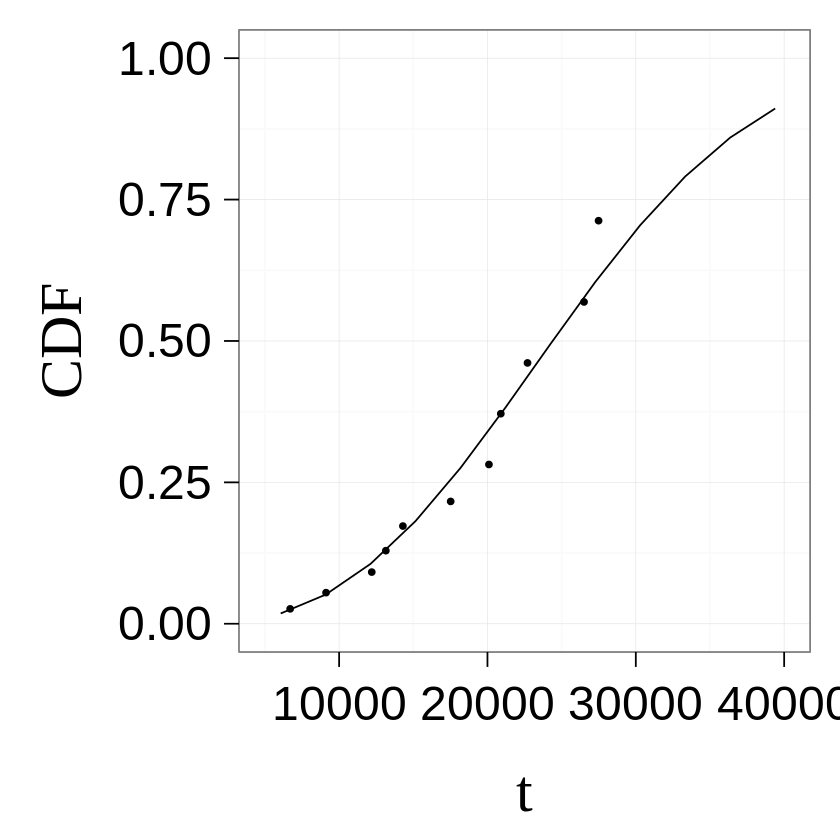

In [43]:
sigma = 1/par.n[2]
mu = -par.n[1]/par.n[2]

psev = function(z){
  1-exp(-exp(z))
}

# d %>% ggplot(aes(log(t), CDF)) + geom_point()
x = seq(0, 300000, len=100)
y = psev((log(x)-mu)/sigma)
d.weibull = data.frame(x, y)

d %>% ggplot(aes(t, CDF)) + geom_point() +
  geom_line(data = d.weibull, aes(x, y)) +
  xlim(c(5000, 40000))


Warning message:
“Removed 255 rows containing missing values (`geom_textpath()`).”


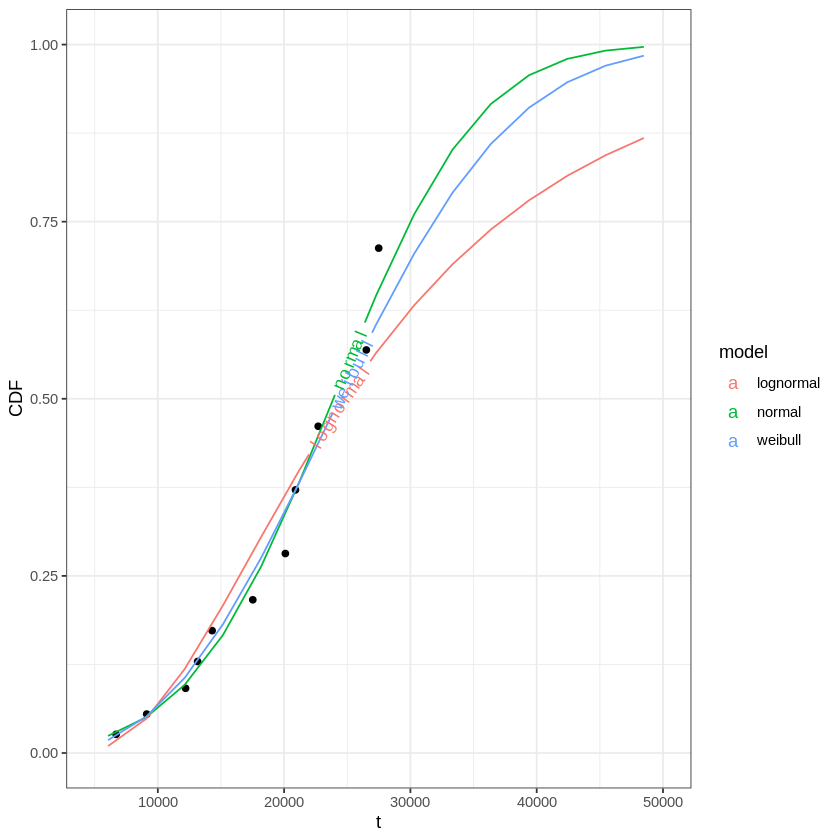

In [54]:
d.normal$model = "normal"
d.lognormal$model = "lognormal"
d.weibull$model = "weibull"

d.models = bind_rows(d.normal, d.lognormal, d.weibull)

library(geomtextpath)
d %>% ggplot(aes(t, CDF)) + geom_point() +
  geom_textpath(data = d.models, aes(x, y, col=model, label=model)) +
  xlim(c(5000, 50000))+
  theme_bw()


In [45]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] scales_1.2.1           directlabels_2023.8.25 statds_0.1.0          
 [4] lubridate_1.9.3        forcats_1.0.0          stringr_1.5.0         
 [7] dpl